In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [3]:
# load the dataset

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# standardscalar = (x-mean / std)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [5]:
sc.fit(df[['Age']]) # fitting Age to standard scalar

StandardScaler()

In [6]:
a = sc.transform (df[['Age']])

In [7]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [8]:
a

array([[-0.53037664],
       [ 0.57183099],
       [-0.25482473],
       [ 0.36516706],
       [ 0.36516706],
       [        nan],
       [ 1.67403863],
       [-1.90813618],
       [-0.18593675],
       [-1.08148046],
       [-1.77036023],
       [ 1.94959054],
       [-0.6681526 ],
       [ 0.64071897],
       [-1.08148046],
       [ 1.74292661],
       [-1.90813618],
       [        nan],
       [ 0.08961515],
       [        nan],
       [ 0.36516706],
       [ 0.29627909],
       [-1.01259248],
       [-0.11704878],
       [-1.49480832],
       [ 0.57183099],
       [        nan],
       [-0.73704057],
       [        nan],
       [        nan],
       [ 0.70960695],
       [        nan],
       [        nan],
       [ 2.50069435],
       [-0.11704878],
       [ 0.8473829 ],
       [        nan],
       [-0.59926462],
       [-0.80592855],
       [-1.08148046],
       [ 0.70960695],
       [-0.18593675],
       [        nan],
       [-1.83924821],
       [-0.73704057],
       [  

In [9]:
sc.mean_

array([29.69911765])

In [10]:
sc.scale_

array([14.51632115])

In [11]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [12]:
df['Age_scaled'] = pd.DataFrame(a)

In [13]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825


In [14]:
import seaborn as sns

<Axes: ylabel='Density'>

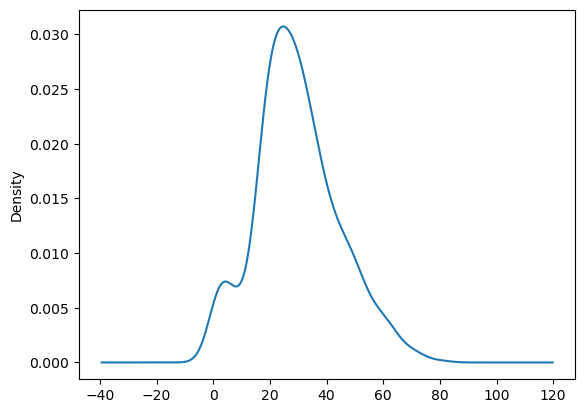

In [15]:
df['Age'].plot(kind = 'kde')

<Axes: ylabel='Density'>

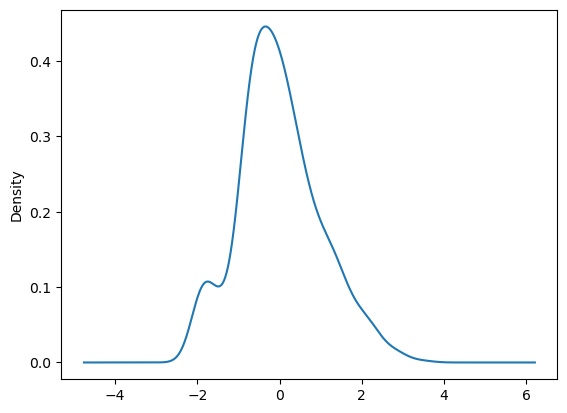

In [16]:
df['Age_scaled'].plot(kind='kde')

## which works fast big values or small values[pls check KNN model]

## Mean normalisation

In [17]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [18]:
ranges = df['Age'].max(axis=0) - df['Age'].min(axis=0)
ranges

79.58

In [19]:
mean = df['Age'].mean()

In [20]:
df['Age_MN'] = (df['Age'] - mean) / ranges

In [21]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_scaled,Age_MN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377,-0.096747
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831,0.104309
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825,-0.046483


### Data Leakage:

In [22]:
a = [1,2,3,np.nan,4,5,6,7,8,np.nan,9,11,12,1,4,1,4,5,np.nan]
df = pd.DataFrame(a,columns=['data'])

In [23]:
df

,data
0,1.0
1,2.0
2,3.0
3,NaN
4,4.0
5,5.0
6,6.0
7,7.0
8,8.0
9,NaN


In [24]:
df.isnull().sum()

data    3
dtype: int64

In [25]:
train = df['data'][:12]
train

0      1.0
1      2.0
2      3.0
3      NaN
4      4.0
5      5.0
6      6.0
7      7.0
8      8.0
9      NaN
10     9.0
11    11.0
Name: data, dtype: float64

In [26]:
test = df['data'][12:]

In [27]:
test

12    12.0
13     1.0
14     4.0
15     1.0
16     4.0
17     5.0
18     NaN
Name: data, dtype: float64

#### how to handle outliers:

- capping with mean and std
- 5th and 95th quantile

In [28]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: ylabel='Density'>

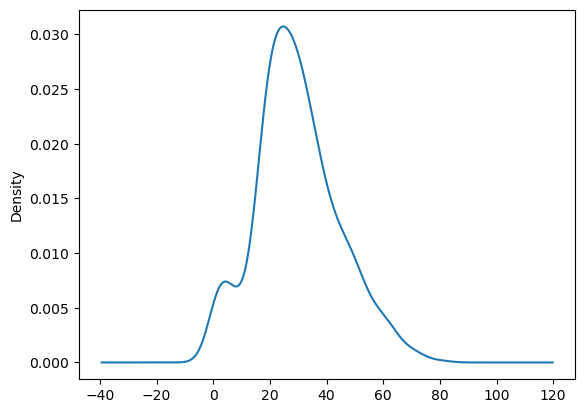

In [29]:
df['Age'].plot(kind='kde')

<Axes: >

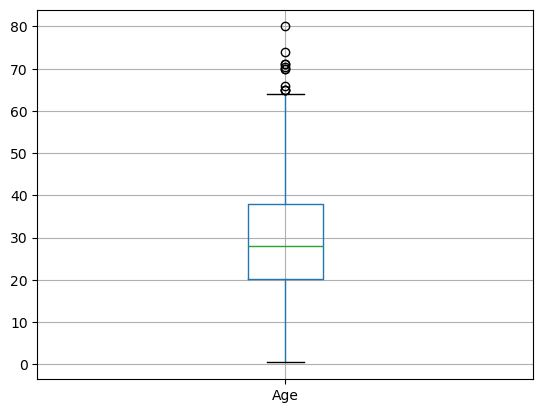

In [30]:
df[['Age']].boxplot()

<Axes: >

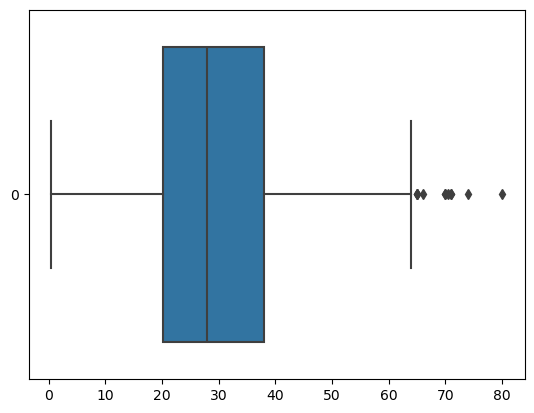

In [31]:
sns.boxplot(df['Age'],orient="h")

In [32]:
def capping(df,var,value):
    upper=df[var].mean()+value*df[var].std()
    lower=df[var].mean()-value*df[var].std()

    return upper,lower

In [33]:
upper,lower = capping(df,'Age',1.5)

In [34]:
upper

51.48886364555989

In [35]:
lower

7.909371648557755

In [36]:
df['Age_out'] = np.where(df['Age'] > upper , upper,
                         np.where(df['Age']< lower,lower,df['Age']))

In [37]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_out
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0


<Axes: >

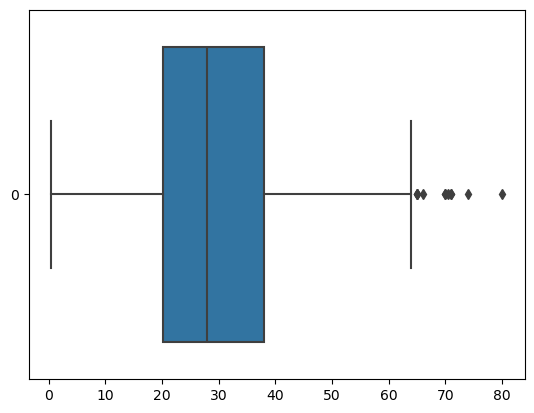

In [38]:
sns.boxplot(df['Age'] , orient="h") # for original column

<Axes: >

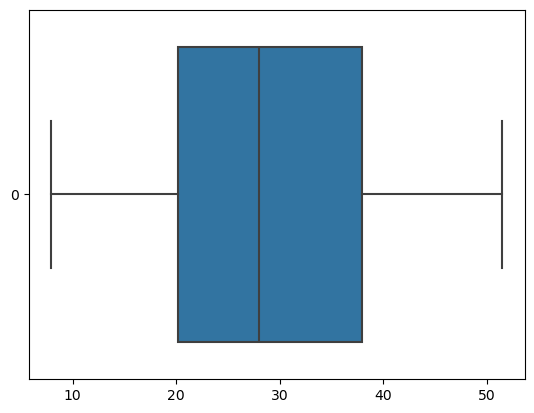

In [39]:
sns.boxplot(df['Age_out'] , orient="h")

### 5th and 95th quantiles

In [40]:
def quantile(df,var,value):
    upper=df[var].quantile(0.95)
    lower=df[var].quantile(0.05)

    return upper,lower

In [41]:
upper,lower = quantile(df,'Age',1.5)

In [42]:
upper

56.0

In [43]:
lower

4.0

In [44]:
df['Age_qun'] = np.where(df['Age'] > upper , upper,
                         np.where(df['Age']< lower,lower,df['Age']))

<Axes: >

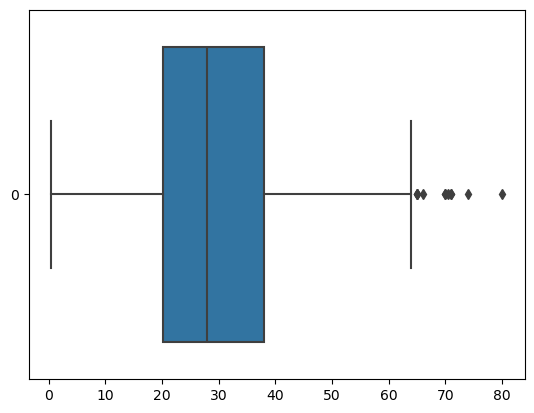

In [45]:
sns.boxplot(df['Age'] , orient="h")

<Axes: >

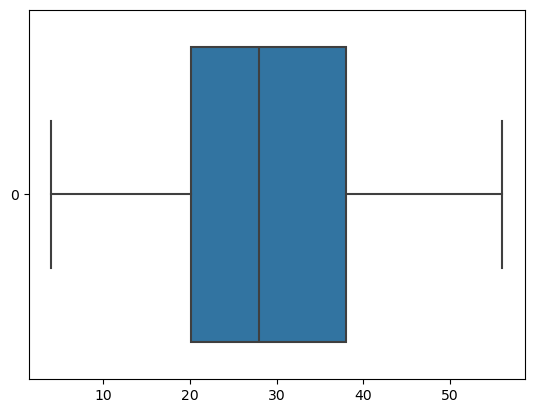

In [46]:
sns.boxplot(df['Age_qun'] , orient="h")

<Axes: >

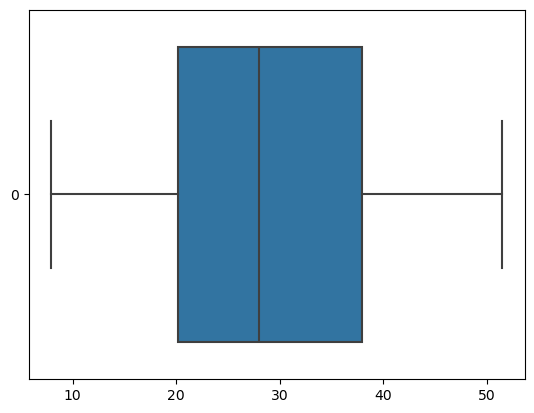

In [47]:
# capping
sns.boxplot(df['Age_out'],orient="h")

### fare column:

<Axes: ylabel='Density'>

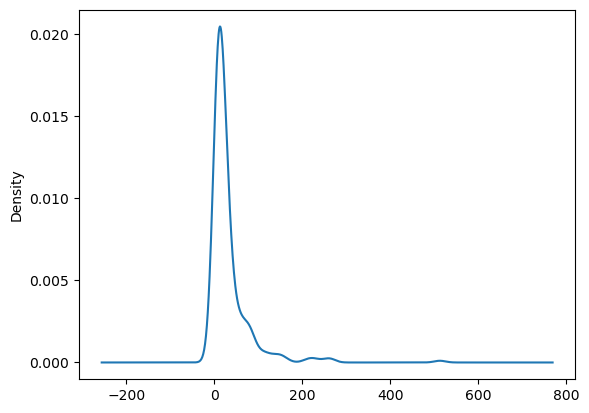

In [48]:
df['Fare'].plot(kind='kde')

<Axes: >

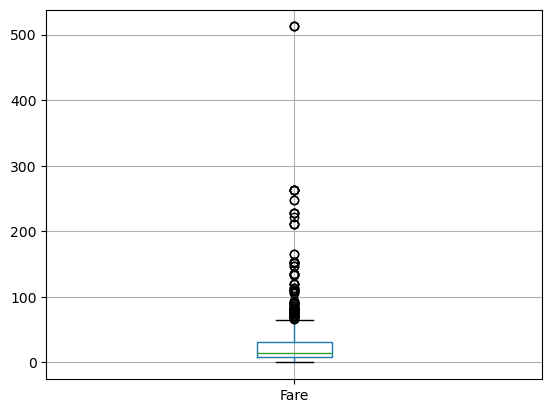

In [49]:
df[['Fare']].boxplot()

<Axes: >

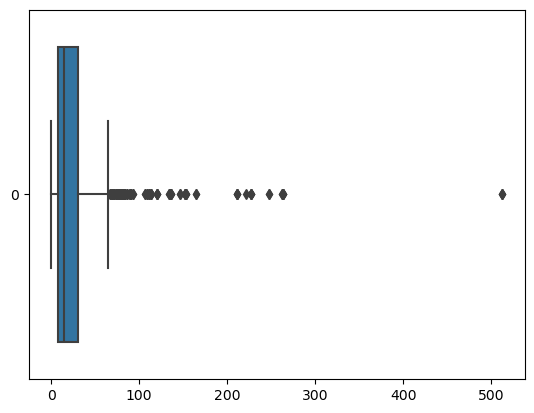

In [51]:
sns.boxplot(df['Fare'],orient="h")

In [52]:
def capping(df,var,value):
    upper=df[var].mean()+value*df[var].std()
    lower=df[var].mean()-value*df[var].std()

    return upper,lower

In [53]:
upper,lower = capping(df,'Fare',1.5)

In [54]:
upper

106.74435086434599

In [55]:
lower

-42.33593492719672

In [56]:
df['Fare_out'] = np.where(df['Fare'] > upper , upper,
                         np.where(df['Fare']< lower,lower,df['Fare']))

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_out,Age_qun,Fare_out
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,8.0500


<Axes: >

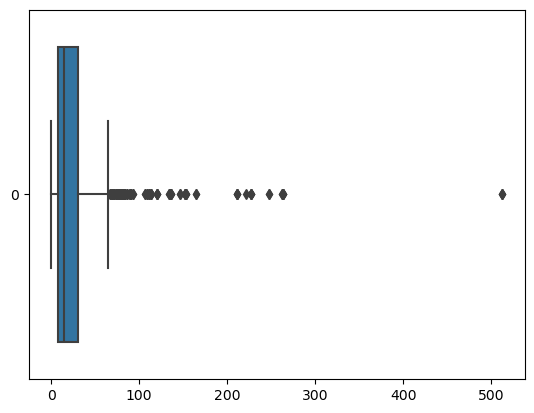

In [59]:
sns.boxplot(df['Fare'],orient="h")

<Axes: >

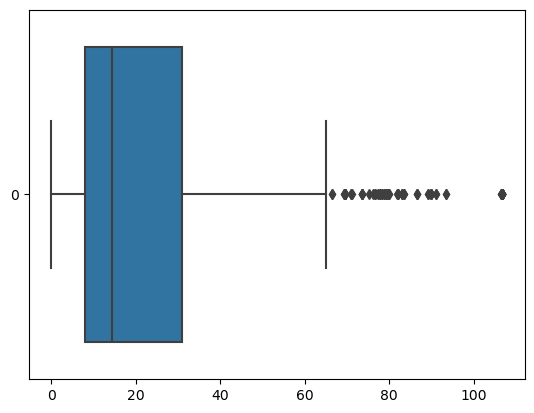

In [60]:
sns.boxplot(df['Fare_out'],orient="h")

In [61]:
def quantile(df,var,value):
    upper=df[var].quantile(0.95)
    lower=df[var].quantile(0.05)

    return upper,lower

In [62]:
upper,lower = quantile(df,'Fare',1.5)

In [63]:
upper

112.07915

In [64]:
lower

7.225

In [65]:
df['Fare_qun'] = np.where(df['Fare'] > upper , upper,
                         np.where(df['Fare']< lower,lower,df['Fare']))

<Axes: >

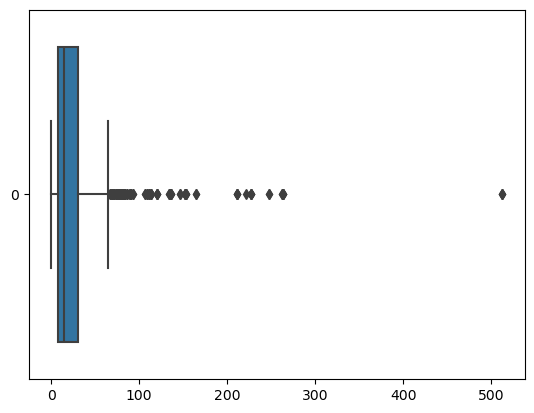

In [66]:
sns.boxplot(df['Fare'],orient="h")

<Axes: >

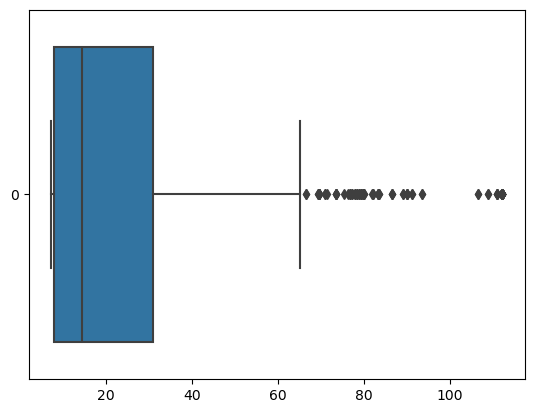

In [68]:
sns.boxplot(df['Fare_qun'],orient="h")